**1-C)Visualizing Regularzation**
---



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading Datapoints from the CSV file

In [45]:
df = pd.read_csv("fods_1.csv")
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


Function to calculate error as per the given optimization problem.
<br>
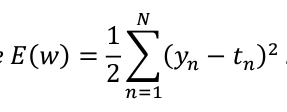

In [46]:
def error_calc(col1,col2,col3,w1,w2,n):
  total_error=0
  for i in range(n):
    total_error+=(col3[i]-(w1*col1[i]+w2*col2[i]))**2
  return total_error/2

In [47]:
#Taking multiple values of w1 and w2 to generate the error contour plot
N=540
M=540
w1=np.linspace(0,3,N)
w2=np.linspace(0,3,M)
error=np.zeros([N,M])
x1 = np.array(df['MLOGP'])
x2 = np.array(df['RDCHI'])
t  = np.array(df['quantitative response of LC50'])

X,Y=np.meshgrid(w1,w2)
print(X)
print(Y)

[[0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]
 [0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]
 [0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]
 ...
 [0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]
 [0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]
 [0.         0.00556586 0.01113173 ... 2.98886827 2.99443414 3.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00556586 0.00556586 0.00556586 ... 0.00556586 0.00556586 0.00556586]
 [0.01113173 0.01113173 0.01113173 ... 0.01113173 0.01113173 0.01113173]
 ...
 [2.98886827 2.98886827 2.98886827 ... 2.98886827 2.98886827 2.98886827]
 [2.99443414 2.99443414 2.99443414 ... 2.99443414 2.99443414 2.99443414]
 [3.         3.         3.         ... 3.         3.         3.        ]]


<Figure size 3600x3600 with 0 Axes>

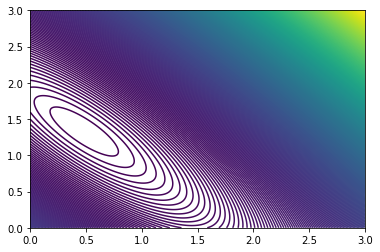

In [48]:
for i in range(N):
  for j in range(M):
    error[i][j] = error_calc(x1,x2,t,w1[i],w2[j],t.size)
  # print(f[i][j])

figure=plt.figure(figsize=(50,50))
fig, ax=plt.subplots()
ax.contour(X,Y,np.transpose(error),500)
plt.show()

In [49]:
e=[1.4,0.1,0.035,0.052]
pwr=[0.5,1,2,4]

In [50]:
def regular(idx,par1,par2):
  res = par1**(pwr[idx]) + par2**(pwr[idx])
  return res


In [51]:
def regular_fn(idx,X,Y):
  f1=np.zeros([N,N])
  for i in range(N):
    for  j in range(M):
      f1[i][j]=regular(idx,X[i][j],Y[i][j])
    #print(f1[i][j])  
  return f1

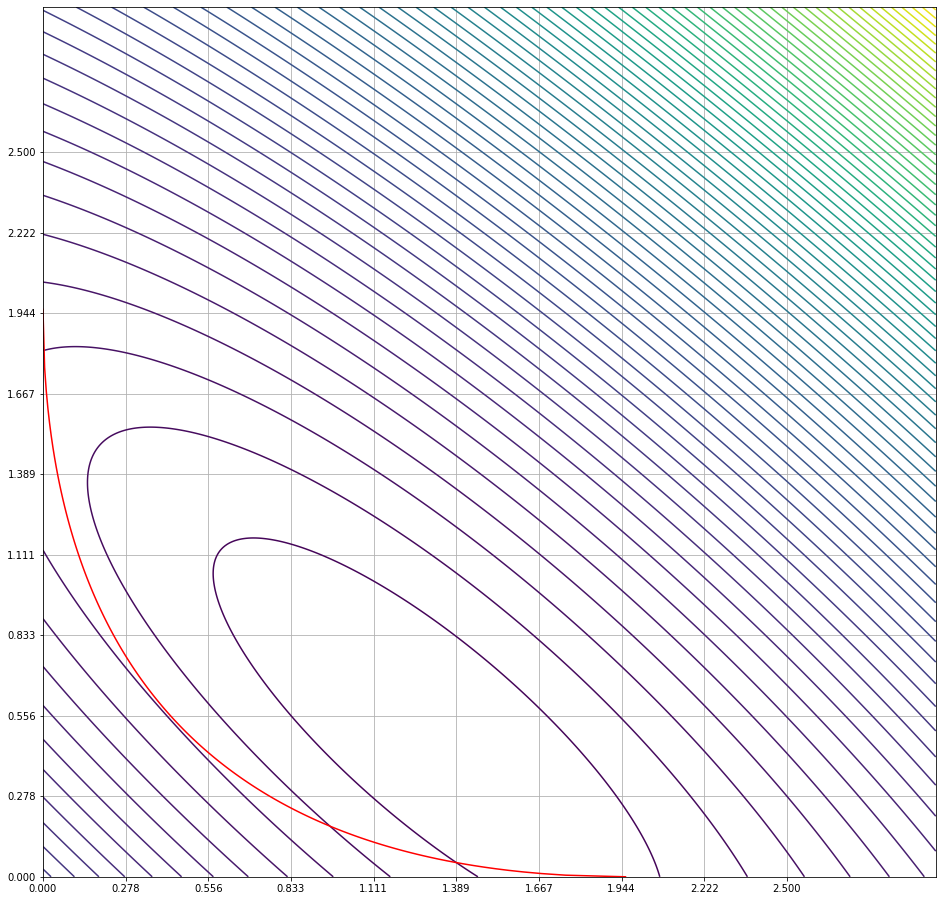

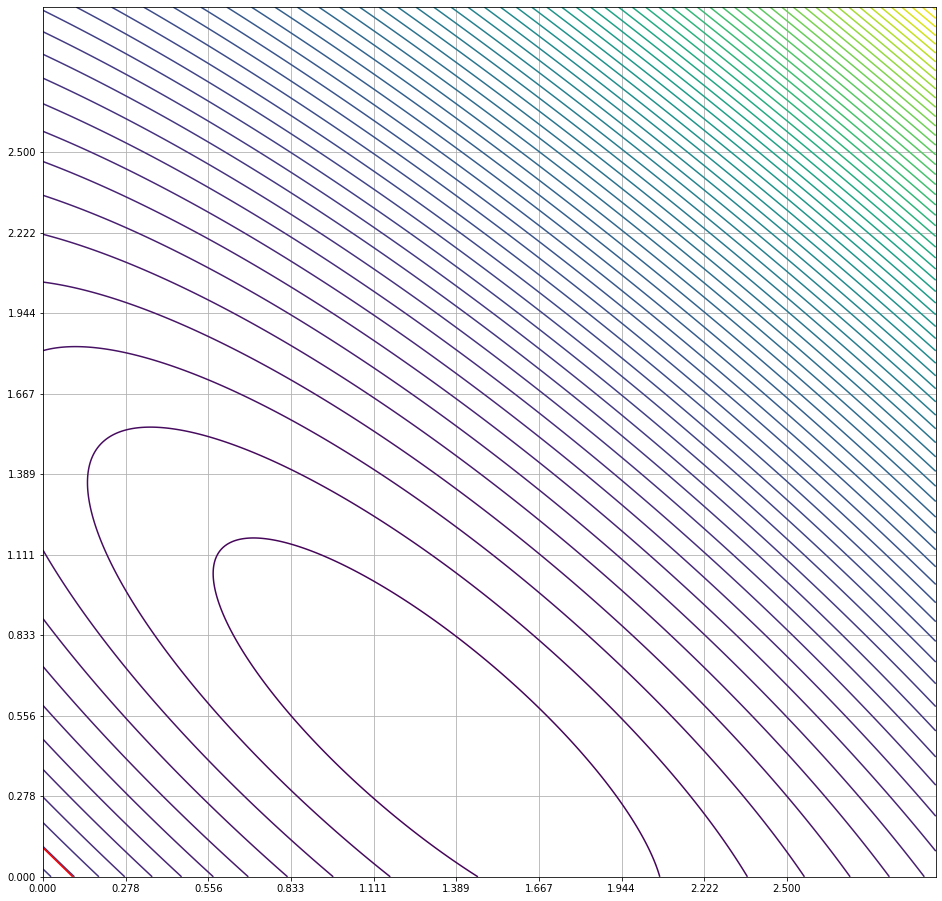

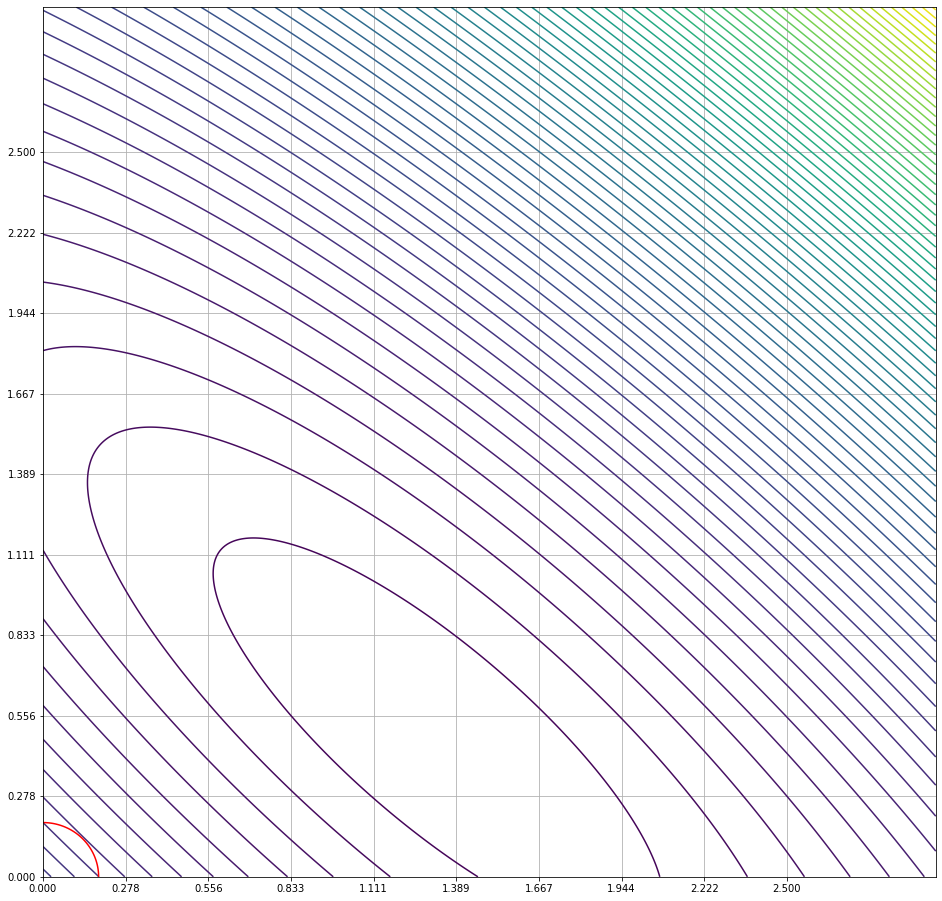

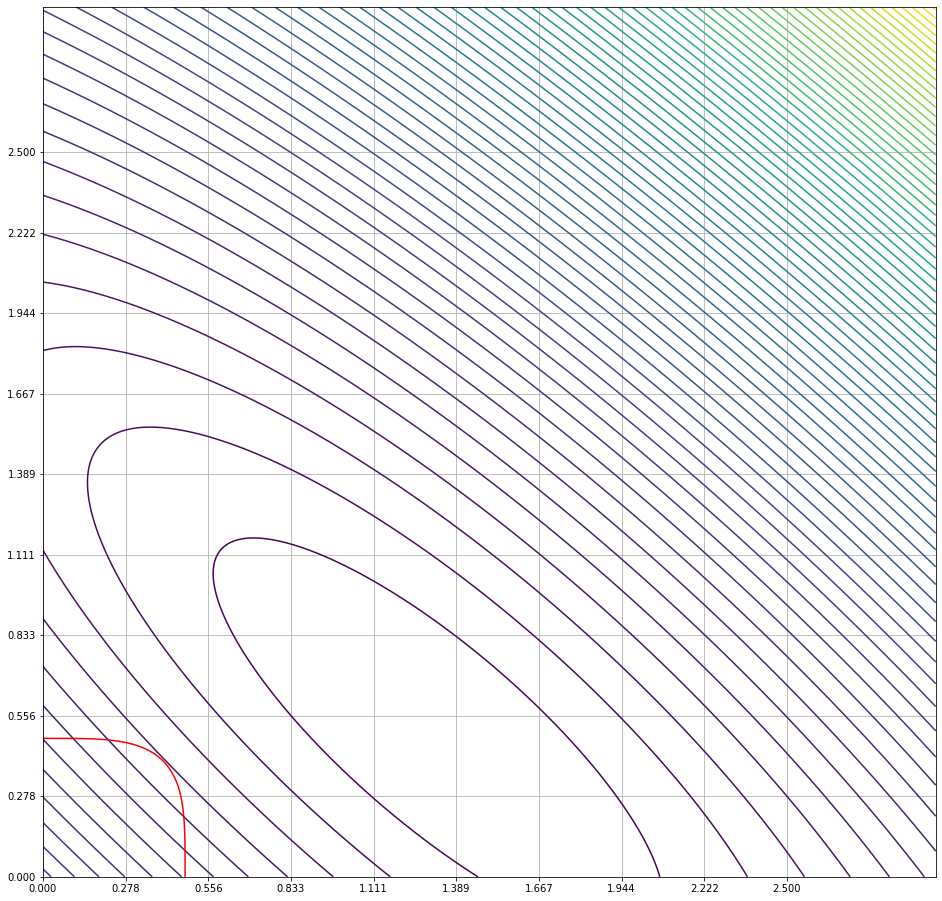

In [52]:
for i in range(4):
  plt.figure(figsize=(16,16))
  plt.xticks(np.linspace(0,2.5,10))
  plt.yticks(np.linspace(0,2.5,10))
  plt.contour(X,Y,error,77)
  k=regular_fn(i,X,Y)
  plt.contour(X,Y,k,[e[i]],colors='r')
  plt.grid()
# plt.show()

To estimate the corresponding values of w1 and w2 for given limitations, we have taken an approximate point where the curve shall intersect.

Point of intersection of the tangential contour 
and the constraint region i.e. Approximate Values for which global minima will occur are tabulated below: 


\\begin{array}{|c|c|} \hline
 & q = 0.5 & q = 1 & q = 2 & q = 4 \\ \hline
w1 & 0.005 & 0.100 & 0.132 & 0.402 \\ \hline
w2 & 1.767 & 0.000 & 0.132 & 0.402 \\\hline
\end{array}

In [55]:
t_ = t.size/2

print("For q = 0.5")
print(error_calc(x1,x2,t,0.005,1.767,t.size) / t_)

print("\nFor q = 1")
print(error_calc(x1,x2,t,0.1,0,t.size) / t_)

print("\nFor q = 2")
print(error_calc(x1,x2,t,0.132,0.132,t.size) / t_)

print("\nFor q = 4")
print(error_calc(x1,x2,t,0.402,0.402,t.size) / t_)

For q = 0.5
3.0085828052119625

For q = 1
22.08703410097069

For q = 2
18.492851787217553

For q = 4
9.276262883492295




**MSE Rounded off to 3-digits**
\\begin{array}{|c|c|} \hline
 & q = 0.5 & q = 1 & q = 2 & q = 4 \\ \hline
MSE & 3.009 & 22.087 & 18.493 & 9.276 \\ \hline
\end{array}